# Objective: Make generic Machine Learning model by parsing the json data and implimenting the parsed values in model

### Importing Libraries

In [1]:
# Import Libraries
import json   # To handle json data
import pandas as pd   # To processing the dataframe
import matplotlib.pyplot as plt  # To plot graph / visualize the data
import numpy as np  # To computation
import seaborn as sns  # To make graphs more interative
import sklearn 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # Evaluat the model
from sklearn.model_selection import train_test_split  # To split dataset in training and testing
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Normalizing the data
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Dealing with warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option("display.max_columns", None)

### Parsing json file and importing the data

In [2]:
# Defining function to convert text file to json file
def convert_txt_to_json(txt_file_path, json_file_path):
    try:
        # Open the text file containing json data
        with open(txt_file_path, 'r') as txt_file:
            # Read the content of the file
            data = txt_file.read()
            
            # Load the json data
            json_data = json.loads(data)
            
            # Write the parsed json data into a new json file
            with open(json_file_path, 'w') as json_file:
                json.dump(json_data, json_file, indent=4)
                
        print("Conversion successful.")
        
    except FileNotFoundError:
        print("File not found.")

txt_file_path = "algoparams_from_ui1.txt" # Input file
json_file_path = "parsed_data.json"  # Output file

convert_txt_to_json(txt_file_path, json_file_path)

Conversion successful.


In [3]:
# defining function to load json data
def load_data(json_file_path):
    # Open the json file
    with open(json_file_path, "r") as json_file:
        # Load the json file
        json_data = json.load(json_file)
    return json_data

parsed_data = load_data("parsed_data.json")

In [4]:
import pprint  # To print json data in understandable format
pprint.pp(parsed_data)

{'session_name': 'test',
 'session_description': 'test',
 'design_state_data': {'session_info': {'project_id': '1',
                                        'experiment_id': 'kkkk-11',
                                        'dataset': 'iris_modified.csv',
                                        'session_name': 'test',
                                        'session_description': 'test'},
                       'target': {'prediction_type': 'Classification',
                                  'target': 'species',
                                  'type': 'classifiation',
                                  'partitioning': True},
                       'train': {'policy': 'Split the dataset',
                                 'time_variable': 'sepal_length',
                                 'sampling_method': 'No sampling(whole data)',
                                 'split': 'Randomly',
                                 'k_fold': False,
                                 'train_ratio': 0.8,


In [5]:
type(parsed_data)

dict

In [6]:
# Extracting value for dataset key
data = parsed_data["design_state_data"]["session_info"]["dataset"]
data

'iris_modified.csv'

In [7]:
# Defining function to read CSV data
def read_data(path):
    df = pd.read_csv(path)
    
    return df

a = read_data(data)

### Feature handling / data processing

In [8]:
# Feature Handling

# Extracting values for required features key
feature_sl = parsed_data["design_state_data"]["feature_handling"]["sepal_length"]["feature_details"]
feature_sw = parsed_data["design_state_data"]["feature_handling"]["sepal_width"]["feature_details"]
feature_pl = parsed_data["design_state_data"]["feature_handling"]["petal_length"]["feature_details"]
feature_pw = parsed_data["design_state_data"]["feature_handling"]["petal_width"]["feature_details"]

# Making list of features
features = [feature_sl, feature_sw, feature_pl, feature_pw]

for i in features:
    if i["missing_values"].lower() == "Impute":
        for x in a.columns:
            if a[x].dtype=='object' or a[x].dtype=='bool':
                a[x].fillna(a[x].mode()[0],inplace=True)

            elif a[x].dtype=='int64' or a[x].dtype=='float64':
                    a[x].fillna(a[x].mean(),inplace=True)

    else:
        a

In [9]:
# Spliting data
y = a[parsed_data["design_state_data"]["target"]["target"]]
X = a.drop(parsed_data["design_state_data"]["target"]["target"], axis=1)

### Train Test split

In [10]:
# Spliting data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=1-parsed_data["design_state_data"]["train"]["train_ratio"],
                                                    random_state=parsed_data["design_state_data"]["train"]["random_seed"])

In [11]:
# Standardization of data
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

### Model Building

In [12]:
# Making list of models from json data
l = list(parsed_data["design_state_data"]["algorithms"].keys())

y_type = parsed_data["design_state_data"]["target"]["prediction_type"]

sub=[]

if y_type == "Classification":
    for z in l:
        sub = [s for s in l if "Classifier" in s]
#         cls = [y.unique()]
        
elif y_type != "Classification":
    for z in l:
        sub = [s for s in l if "Regressor" in s]

In [13]:
# Model building
models = {}  # Making Dictionary to store model names as keys and their predictions as values

for model_name in sub:
    try:
        # Iterating models from list
        model_class = eval(model_name)  # Evaluate the string to get the class object
        model = model_class()  # Instantiate the model
        model.fit(X_train_scale, y_train)  # Fit the model
        y_pred = model.predict(X_test_scale)
        models[model_name] = y_pred  # Store predictions with model name as key
    except NameError:
        print(f"Model '{model_name}' not found.")

for model_name, y_pred in models.items():
    print(f"Predictions for model '{model_name}': {y_pred}")

# To save prediction in list
predictions = [models[model_name] for model_name in sub]
predictions

Predictions for model 'RandomForestClassifier': ['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']
Predictions for model 'DecisionTreeClassifier': ['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-

[array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
       dtype=object),
 array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris

### Model Evaluation

In [14]:
# Defining model Evaluation Function
def plot_confusion_metrix(y_test, 
                          y_pred,
                          classes, 
                          normalize=False, 
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues):

    cm = confusion_matrix(y_test,y_pred)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("---------------- Normalized Confusion Matrix ------------------")
    else:
        print("--------------------- Confusion Matrix, Without Normalisation ------------------")


    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[0]):
            plt.text(j, i, format(cm[i,j], fmt),
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

    print("----------------------- Classification report ----------------------")
    print('Classification report')
    print(classification_report(y_test,y_pred))

    print("------------------------- Accuracy Score -------------------------")
    acc= accuracy_score(y_test,y_pred)
    print("Accuracy of the model: ", acc)

--------------------- Confusion Matrix, Without Normalisation ------------------


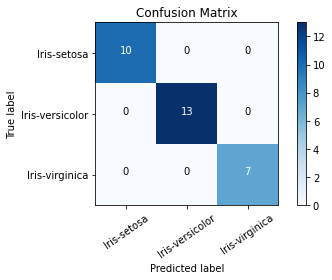

----------------------- Classification report ----------------------
Classification report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

------------------------- Accuracy Score -------------------------
Accuracy of the model:  1.0
--------------------- Confusion Matrix, Without Normalisation ------------------


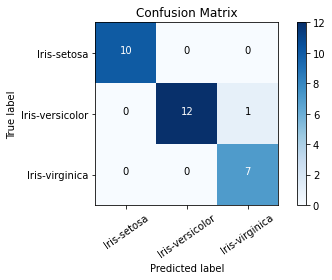

----------------------- Classification report ----------------------
Classification report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

------------------------- Accuracy Score -------------------------
Accuracy of the model:  0.9666666666666667


In [15]:
for pred in predictions:
    plot_confusion_metrix(y_test, 
                          y_pred=pred,
                          classes=["Iris-setosa", "Iris-versicolor", "Iris-virginica"], 
                          normalize=False, 
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues)